This section is for initial visualisations and to get a preliminary understanding of what we are dealing with.

In [1]:
#the list of packages
import pandas as pd
import requests
# from sklearn import linear_model, tree, model_selection, neighbors, svm
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#from bs4 import BeautifulSoup

In [2]:
main_data_df = pd.read_csv("spacex_df_cap.csv")
main_data_df.head()

,date,rocket,launchpad,launch_lat,launch_long,flight_number,flight,orbit,mass_kg,landpad,...,legs_True,reused_False,reused_True,landing_attempt_False,landing_attempt_True,landing_success_False,landing_success_True,landing_type_ASDS,landing_type_Ocean,landing_type_RTLS
0,2006-03-24,Falcon 1,Kwajalein Atoll,9.047721,167.743129,1,1,LEO,20.0,NaN,...,0,1,0,1,0,0,0,0,0,0
1,2007-03-21,Falcon 1,Kwajalein Atoll,9.047721,167.743129,2,1,LEO,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0
2,2008-09-28,Falcon 1,Kwajalein Atoll,9.047721,167.743129,4,1,LEO,165.0,NaN,...,0,1,0,1,0,0,0,0,0,0
3,2009-07-13,Falcon 1,Kwajalein Atoll,9.047721,167.743129,5,1,LEO,200.0,NaN,...,0,1,0,1,0,0,0,0,0,0
4,2010-06-04,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,6,1,LEO,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0


In [3]:
spacex_df = main_data_df.copy()

In [4]:
spacex_df.head()

,date,rocket,launchpad,launch_lat,launch_long,flight_number,flight,orbit,mass_kg,landpad,...,legs_True,reused_False,reused_True,landing_attempt_False,landing_attempt_True,landing_success_False,landing_success_True,landing_type_ASDS,landing_type_Ocean,landing_type_RTLS
0,2006-03-24,Falcon 1,Kwajalein Atoll,9.047721,167.743129,1,1,LEO,20.0,NaN,...,0,1,0,1,0,0,0,0,0,0
1,2007-03-21,Falcon 1,Kwajalein Atoll,9.047721,167.743129,2,1,LEO,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0
2,2008-09-28,Falcon 1,Kwajalein Atoll,9.047721,167.743129,4,1,LEO,165.0,NaN,...,0,1,0,1,0,0,0,0,0,0
3,2009-07-13,Falcon 1,Kwajalein Atoll,9.047721,167.743129,5,1,LEO,200.0,NaN,...,0,1,0,1,0,0,0,0,0,0
4,2010-06-04,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,6,1,LEO,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0


The landing_success column has the data on successful landings and will be our target/dependent variable

In [5]:
spacex_df.insert(1,"year",list(pd.DatetimeIndex(spacex_df["date"]).year))

In [6]:
spacex_df.head()

,date,year,rocket,launchpad,launch_lat,launch_long,flight_number,flight,orbit,mass_kg,...,legs_True,reused_False,reused_True,landing_attempt_False,landing_attempt_True,landing_success_False,landing_success_True,landing_type_ASDS,landing_type_Ocean,landing_type_RTLS
0,2006-03-24,2006,Falcon 1,Kwajalein Atoll,9.047721,167.743129,1,1,LEO,20.0,...,0,1,0,1,0,0,0,0,0,0
1,2007-03-21,2007,Falcon 1,Kwajalein Atoll,9.047721,167.743129,2,1,LEO,NaN,...,0,1,0,1,0,0,0,0,0,0
2,2008-09-28,2008,Falcon 1,Kwajalein Atoll,9.047721,167.743129,4,1,LEO,165.0,...,0,1,0,1,0,0,0,0,0,0
3,2009-07-13,2009,Falcon 1,Kwajalein Atoll,9.047721,167.743129,5,1,LEO,200.0,...,0,1,0,1,0,0,0,0,0,0
4,2010-06-04,2010,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,6,1,LEO,NaN,...,0,1,0,1,0,0,0,0,0,0


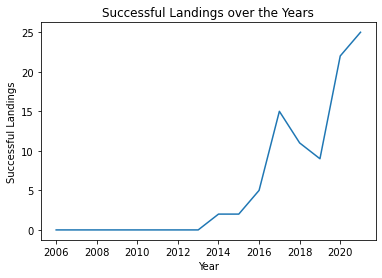

In [7]:
#plotting the successful landings over the years
temp_df = spacex_df.groupby("year").sum()
sns.lineplot(data=temp_df,x="year",y="landing_success_True")
plt.title("Successful Landings over the Years")
plt.xlabel("Year")
plt.ylabel("Successful Landings")
plt.show()

Easy to observe that successful landings have possible since 2013, thus we can filter the data to only have years on and after 2013

In [8]:
spacex_2013 = spacex_df[spacex_df["year"]>=2013]

In [9]:
print("The total number of successful landings since 2013: ",spacex_2013.shape[0])

The total number of successful landings since 2013:  120


In [10]:
temp_df = spacex_df.groupby("rocket").sum().drop(["year","launch_lat","launch_long","flight_number"],axis=1)
temp_df.head()

,flight,mass_kg,success_False,success_True,gridfins_False,gridfins_True,legs_False,legs_True,reused_False,reused_True,landing_attempt_False,landing_attempt_True,landing_success_False,landing_success_True,landing_type_ASDS,landing_type_Ocean,landing_type_RTLS
rocket,,,,,,,,,,,,,,,,,
Falcon 1,4,385.00,2,2,4,0,4,0,4,0,4,0,0,0,0,0,0
Falcon 9,333,807531.55,2,120,20,102,19,103,56,66,19,103,10,91,78,7,18


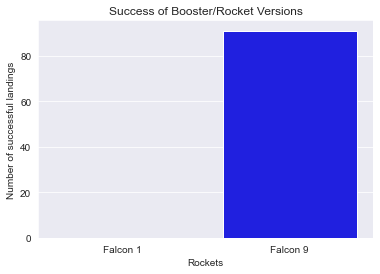

In [11]:
sns.set_style("darkgrid")
sns.barplot(data=temp_df,x=temp_df.index,y="landing_success_True",color="blue")
plt.title("Success of Booster/Rocket Versions")
plt.ylabel("Number of successful landings")
plt.xlabel("Rockets")
plt.show()

Thus, we can further filter the data to have only Falcon 9 rockets since Falcon 1 rockets did  not have successful landings. There was definite upgrades between these two versions.

In [12]:
spacex_2013 = spacex_2013[spacex_df["rocket"]=="Falcon 9"]

<ipython-input-12-654a5472a2a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spacex_2013 = spacex_2013[spacex_df["rocket"]=="Falcon 9"]


In [13]:
spacex_2013.reset_index(inplace=True,drop=True)

In [14]:
print("The number of Falcon 9 rockets = ", spacex_2013.shape[0])

The number of Falcon 9 rockets =  120


In [15]:
spacex_2013.head()

,date,year,rocket,launchpad,launch_lat,launch_long,flight_number,flight,orbit,mass_kg,...,legs_True,reused_False,reused_True,landing_attempt_False,landing_attempt_True,landing_success_False,landing_success_True,landing_type_ASDS,landing_type_Ocean,landing_type_RTLS
0,2013-03-01,2013,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,10,1,ISS,677.0,...,0,1,0,1,0,0,0,0,0,0
1,2013-09-29,2013,Falcon 9,VAFB SLC 4E,34.632093,-120.610829,11,1,PO,500.0,...,0,1,0,0,1,1,0,0,1,0
2,2013-12-03,2013,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,12,1,GTO,3170.0,...,0,1,0,1,0,0,0,0,0,0
3,2014-01-06,2014,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,13,1,GTO,3325.0,...,0,1,0,1,0,0,0,0,0,0
4,2014-04-18,2014,Falcon 9,CCSFS SLC 40,28.561857,-80.577366,14,1,ISS,2296.0,...,1,1,0,0,1,0,1,0,1,0


In [16]:
spacex_2013 = spacex_2013[spacex_2013.orbit != "5f839ac7818d8b59f5740d48"]
spacex_2013 = spacex_2013[spacex_2013.orbit != "TLI"]

Within the mass_kg column there are some nan values, we can replace these values with the average of the mass of the F9 rockets.

In [17]:
temp_mean = spacex_2013["mass_kg"].mean()
spacex_2013["mass_kg"] = spacex_2013["mass_kg"].fillna(temp_mean)

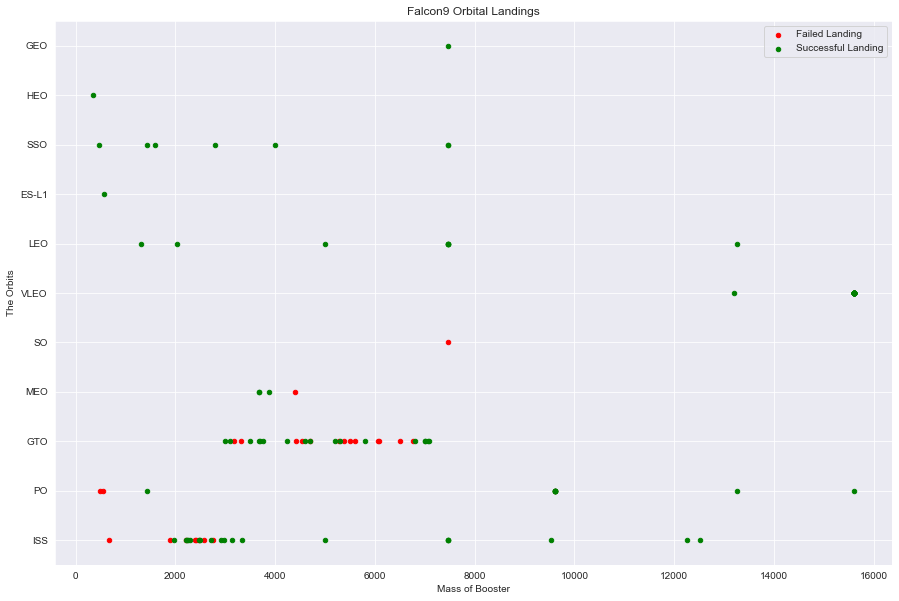

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
colors,labels = ["red","green"],["Failed Landing","Successful Landing"]
for key,group in spacex_2013.groupby("landing_success_True"):
    group.plot(kind="scatter",ax=ax,x="mass_kg",y="orbit",label=key,color=colors[key])
plt.xlabel("Mass of Booster")
plt.ylabel("The Orbits")
plt.legend(labels)
plt.title("Falcon9 Orbital Landings")
plt.show()


In [1]:
fig, ax = plt.subplots(figsize=(15,10))
#colors,labels = ["red","green"],["Failed Landing","Successful Landing"]
for key,group in spacex_2013.groupby("landing_success_True"):
    group.plot(kind="scatter",ax=ax,x="mass_kg",y="launchpad",label=key,color=colors[key])
plt.xlabel("Mass of Booster")
plt.ylabel("The Launchpads")
plt.legend(labels,bbox_to_anchor=(1,0.85))
plt.title("Falcon9 Landings by Launchpad")
plt.show()

NameError: name 'plt' is not defined

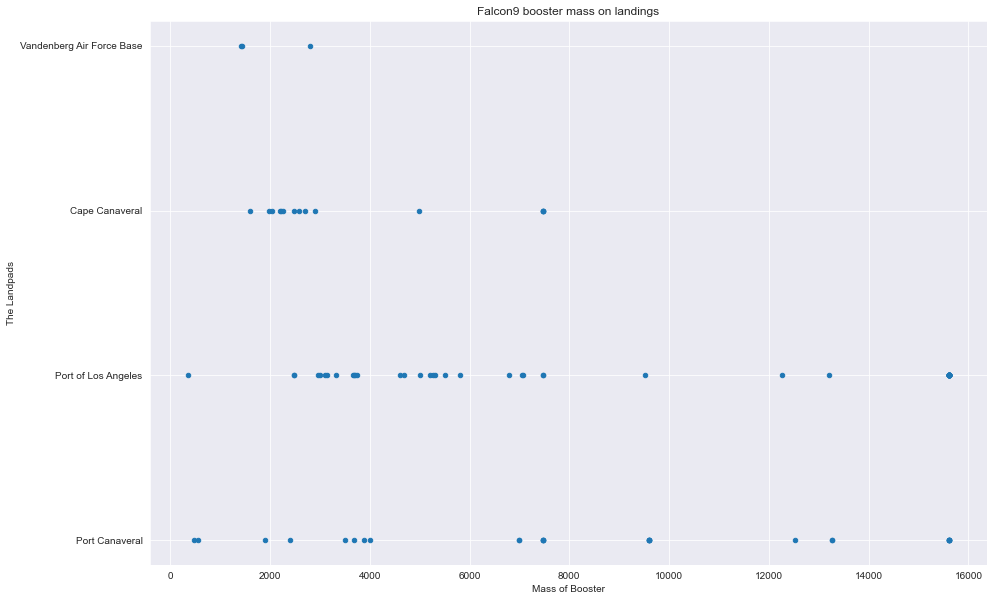

In [20]:
#Plotting the data by the most used landing site, filtering out the unsuccessful landings

fig, ax = plt.subplots(figsize=(15,10))
temp_df =spacex_2013.dropna(subset=["landpad"])
temp_df.plot(kind="scatter",x="mass_kg",y="landpad",ax=ax)
plt.xlabel("Mass of Booster")
plt.ylabel("The Landpads")
plt.title("Falcon9 booster mass on landings")
plt.show()
#colors,labels = ["red","green"],["Failed Landing","Successful Landing"]


The heavier boosters were successfully landed in the Port of Los Angeles and in Port Canaveral.

In [21]:
spacex_2013.to_csv("spacex_df_cap.csv",index=False)